In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

import os

In [5]:
df=pd.read_csv("C://Users//chndn//Downloads//loans_income.csv")
df.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


Definition Of Bootstrap

On easy and effective way to estimate the sampling distributions of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample. This procedure is called the bootstrap.

The bootstrap is used for sample size determination, experiment with different values for n to see how the sampling distribution is affected. The Algorithm for A Bootstrap

Draw a sample value, record, replace it.
Repeat n times.
Record the mean of the n resampled values.
Repeat steps 1-3 R times.
Use the R result to:

        Calculate their standard deviation.
        Produce a histogram or a boxplot.
        Find a Confidence Interval.

In [6]:
loans_income = np.array(pd.read_csv("C://Users//chndn//Downloads//loans_income.csv"))
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]], dtype=int64)

In [7]:
#Making a flat list from list of lists.
loans_income = np.array([item for sublist in loans_income for item in sublist])

In [8]:
def bootstrap(l,R):
    n = len(loans_income)
    #Number of BootStrap Samples
    means_of_boot_samples = []
    for reps in range(R):
        #Steps 1,2
        boot_sample = np.random.choice(loans_income, size = n)
        #Step 3
        means_of_boot_samples.append(round(np.mean(boot_sample)))
    return means_of_boot_samples

bootstrap(loans_income,5)

[68612, 68947, 68780, 68836, 68466]

Now as we have a means of bootstrap samples we can estimate:

A.Their standard daviation(this estimates sample mean standard error)

In [9]:
np.std(bootstrap(loans_income, 100))

145.79780382433748

Produce a histogram or boxplot

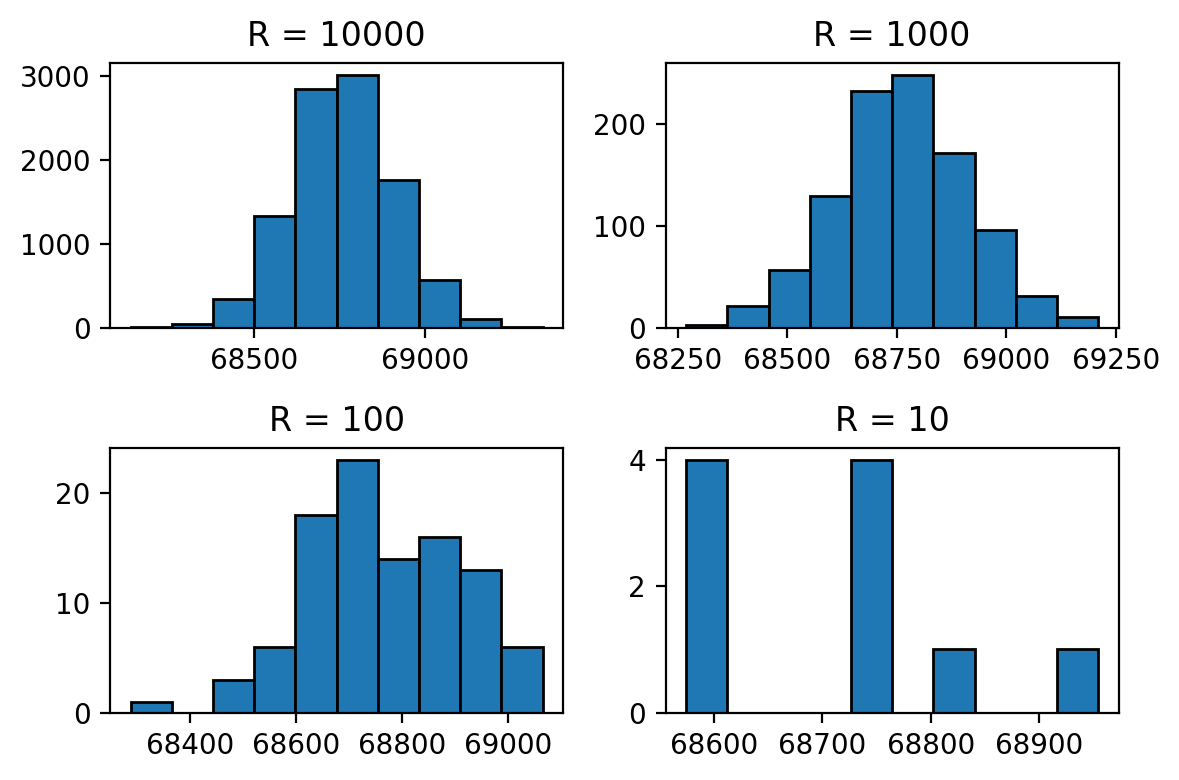

In [10]:
plt.figure(dpi = 200)

plt.subplot(221)
plt.title("R = 10000")
plt.hist(bootstrap(loans_income, 10000), edgecolor = 'k')

plt.subplot(222)
plt.title("R = 1000")
plt.hist(bootstrap(loans_income, 1000), edgecolor = 'k')

plt.subplot(223)
plt.title("R = 100")
plt.hist(bootstrap(loans_income, 100), edgecolor = 'k')

plt.subplot(224)
plt.title("R = 10")
plt.hist(bootstrap(loans_income, 10), edgecolor = 'k')

plt.tight_layout()

As we can see distribution of 10000 means is more compact and bell-shaped than the distribution with smaller amount of means. This phenomenon is termed as central limit theorem.

Find a confidence interval.

In [11]:
data = bootstrap(loans_income, 1000)
lower_lim, upper_lim = np.percentile(data, 2.5), np.percentile(data, 95)
print("Lower Limit: ",lower_lim)
print("Upper Limit: ",upper_lim)

Lower Limit:  68492.95
Upper Limit:  69001.0


C:\Users\chndn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


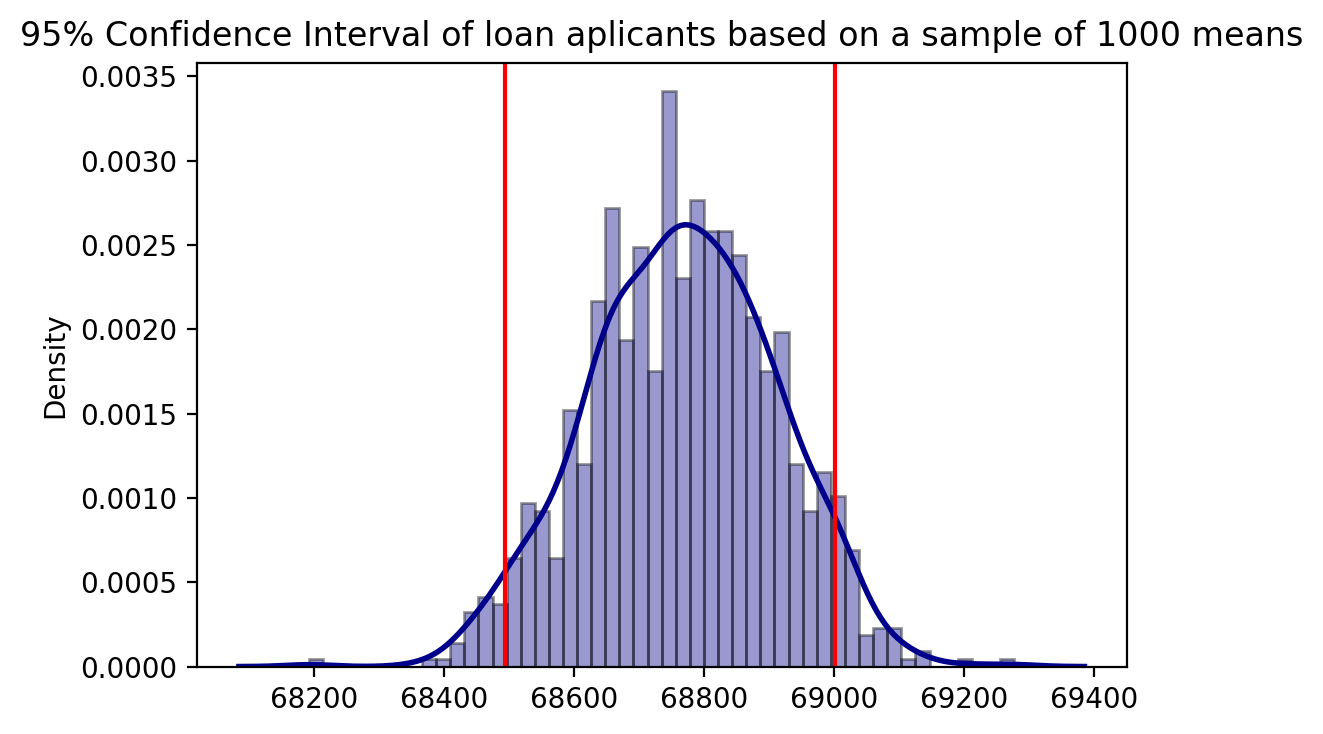

In [12]:
plt.figure(dpi = 200)
plt.title("95% Confidence Interval of loan aplicants based on a sample of 1000 means")

sns.distplot(bootstrap(loans_income, 1000), hist = True, kde=True,
            color = 'darkblue', bins = 50,
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth' : 2})

plt.axvline(x = lower_lim, color = 'red')
plt.axvline(x = upper_lim, color = 'red')